In [48]:
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt

## 2017

### Exercises

In [5]:
IFrame("pp2017.pdf", width=1000, height=500)

### Answers

#### Q3 - Lagrange Interpolation

In [5]:
def p(i, xs, x):
    return np.prod([(x-xs[j])/(xs[i]-xs[j]) for j in range(len(xs)) if j != i])

In [24]:
def lagrange(x0, x, y):
    return sum([y[i]*p(i,x,x0) for i in range(len(x))])

In [25]:
x = np.arange(0.1, 0.4, 0.1)
y = [10,5,-4,-7]

In [28]:
print(lagrange(0.2, x, y), lagrange(0.25, x, y))

5.0 0.37500000000000205


#### Q4 - Monte Carlo

In [43]:
def mc(n):
    n_in = 0
    for i in range(n):
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-1,1)
        z = np.random.uniform(-1,1)
        if x**2 + (y**2)/4 + z**2 <= 1:
            n_in +=1
    p1 = n_in/n
    s1 = 8*p1
    error = 8*np.sqrt(p1*(1-p1))/(np.sqrt(n))
    return s1, error

In [44]:
# analytic solution, numerical result, error
(11*np.pi/6, mc(1000))

(5.759586531581287, (5.704, 0.1144394337630172))

#### Q5 - Euler ODE

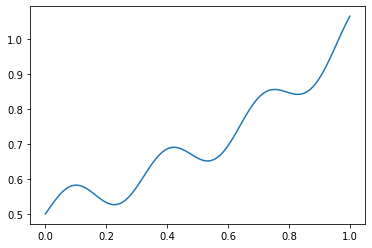

In [49]:
xs = np.linspace(0,1,100)
ys = np.zeros(100)

ys[0] = 1/2
h = xs[1]-xs[0]

for i in range(99):
    ys[i+1] = ys[i]+h*(ys[i]**2+np.cos(20*xs[i]))
    
plt.plot(xs,ys)
plt.show()

#### Q6  - Simpson's

In [37]:
def Simpsons(f,a,b,n):
    # f - some function
    # n - number of interval divisons
    # a,b - interval
    x = np.linspace(a,b,n)
    return sum([(x[i+1]-x[i])/6*(f(x[i])+4*f((x[i] + x[i+1])/2)+f(x[i+1])) for i in range(len(x)-1)])

In [38]:
Simpsons(lambda x: 2/(1+x**2),-1,1,100)

3.1415926535897496

## 2018

### Exercises

In [6]:
IFrame("pp2018.pdf", width=1000, height=500)

### Answers

#### 

#### 

#### 

In [64]:
def h(k):
    return (1+(-1)**k)/(k+1)

In [65]:
h(10)

0.18181818181818182

In [67]:
def nodes_weights(h, n):
    # get polynomials
    # Hc=d
    d = [-h(n+1+k) for k in range(n+1)]
    H = [[h(k+i) for k in range(n+1)] for i in range(n+1)]
    
    # find polynomial coefficients
    c = np.linalg.solve(H,d) 
    c = np.append(c, [1])
    
    #find roots
    x_i = np.roots(c[::-1]).real
    
    #find weights
    #Xa=h
    h = [h(k) for k in range(n+1)]
    X = [[x_i[i]**k for i in range(n+1)] for k in range(n+1)]

    a = np.linalg.solve(X,h)
    
    return x_i, a

In [71]:
nodes_weights(h, 3)

(array([-0.86113631,  0.86113631, -0.33998104,  0.33998104]),
 array([0.34785485, 0.34785485, 0.65214515, 0.65214515]))

#### 

In [59]:
def mc(N):
    n=0
    
    points = {
        "xin": [],
        "yin": [],
        "xout": [],
        "yout": []
    }
    
    for i in range(N):
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-2,2)
        if x**2+(y**2)/4 < 1 and y > -1:
            n += 1
            points['xin'].append(x)
            points['yin'].append(y)
        else:
            points['xout'].append(x)
            points['yout'].append(y)
            
    p1 = n/N
    S1 = p1*8
    error=8*np.sqrt(p1*(1-p1))/(np.sqrt(N))
    
    
    
    return S1, error, points

In [60]:
res = mc(1000)

In [61]:
print("Actual error", res[0] - (np.sqrt(3)/2+4*np.pi/3))
print("Error estimate", res[1])

Actual error -0.21481560857082904
Error estimate 0.12367053003848573


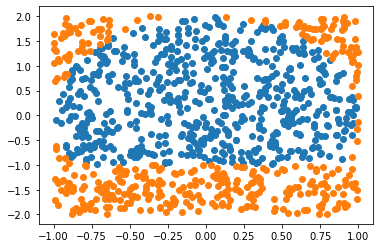

In [63]:
plt.scatter(res[2]["xin"], res[2]["yin"])
plt.scatter(res[2]["xout"], res[2]["yout"])
plt.show()

#### 

#### 

In [97]:
def f(x, y):
    return 1/y + y*np.sin(2*x)

In [98]:
x_s = np.linspace(0,10,200)
y_s = np.zeros(200)

In [99]:
y_s[0] = 1/4
h = x_s[1]-x_s[0]

In [100]:
for i in range(1,200):
    y_s[i] = y_s[i-1] + h*f(x_s[i-1], y_s[i-1])

In [101]:
y_s[-1] #y(10)

3.908486089568521

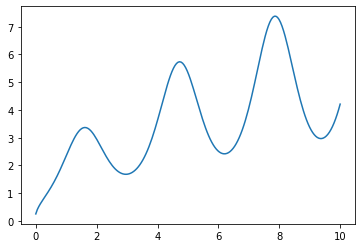

In [106]:
plt.plot(x_s,y_s)
plt.show()

In [104]:
y_k = np.zeros(200)
y_k[0] = 1/4

In [105]:
# runge-kutta 2nd order
for i in range(1,200):
    y_k[i] = y_k[i-1] + 0.5*h*f(x_s[i-1], y_k[i-1]) + 0.5*h*f(x_s[i-1]+h, y_k[i-1] + h*f(x_s[i-1], y_k[i-1]))

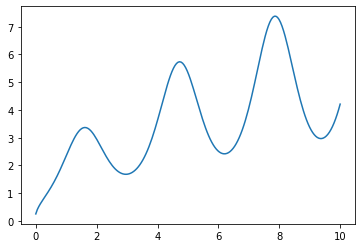

In [107]:
plt.plot(x_s,y_k)
plt.show()

In [108]:
y_k[-1]

4.2095016073206555